Import modules

In [1]:
from bookworm import *

import pandas as pd
import numpy as np
import networkx as nx

import spacy
import nltk
import string

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Names of characters

In [2]:
names = 'Katniss, Peeta, Gale, Haymitch, Prim, Coriolanus, Snow, Marvel, Glimmer, Cato, Clove, Foxface, Thresh, Rue, Gloss, Cashmere, Brutus, Enobaria, Beetee, Latier, Wiress, Mags, Morphling, Blight, Johanna, Mason, Finnick, Odair, Woof, Cecelia, Chaff, Seeder, Effie, Cinna, Mrs. Everdeen, Plutarch, Heavensbee, Seneca, Crane, Madge, Undersee, Mr. Everdeen, Hazelle, Hawthorne, Rory, Vick, Posy, Hawthorne, Mr. Mellark, Mrs. Mellark, Cray, Maysilee, Donner, Romulus, Thread, Mayor, Undersee, Goat, Rooba, Ripper, Lady, Buttercup, Mrs. Undersee , Darius, Caesar, Tigris, Lavinia, Portia, Atala, Alma, Coin, Boggs, Cressida, Messalla, Leeg 1, Leeg 2, Mitchell, Jackson, Homes, Castor, Pollux, Fulvia, Cardew, Dalton, Dr. Aurelius , Annie, Cresta, Titus, Commander Paylor, Bonnie, Twill, Eddy, Commander Lyme, Leevy'
names = [tuple([character]) for character in set(names.split(', '))]

# 1. Book analysis

Loading a book and splitting into sentences

In [5]:
book = load_book(r'C:\Users\1\Documents\UNI\DH\book.txt')
sequences = get_sentence_sequences(book)

Finding connections between sequences and characters and then connections between characters and characters

In [6]:
df = find_connections(sequences, names)
cooccurence = calculate_cooccurence(df)

Setting up a dataframe of interactions which can be passed to **NetworkX** or **Gephi** to visualise

In [7]:
interaction_df = get_interaction_df(cooccurence, threshold=1)
interaction_df.to_csv('book_output.csv')

In [8]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12,9)

C:\Users\1\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


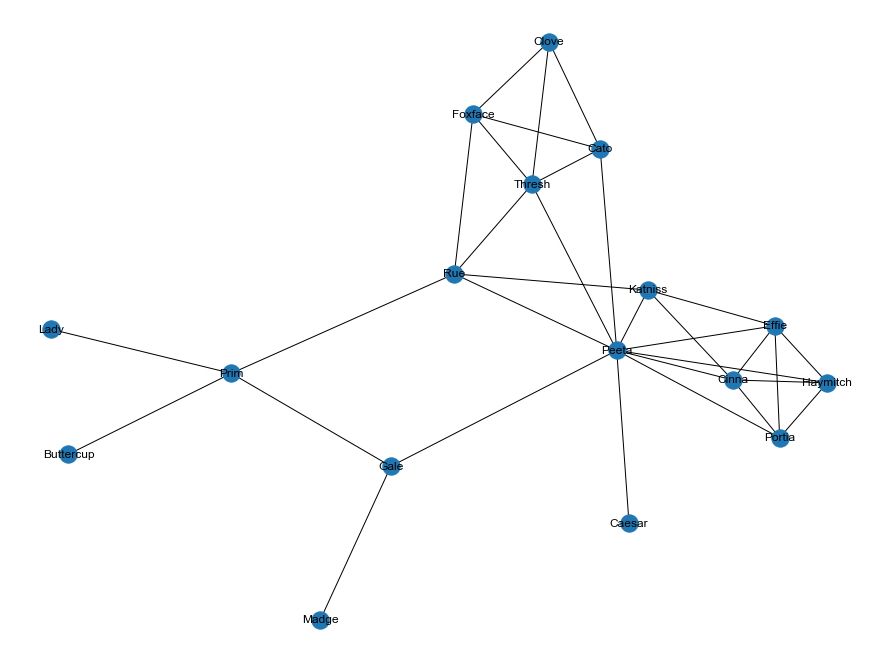

In [9]:
G = nx.from_pandas_edgelist(interaction_df,
                             source='source',
                             target='target')

nx.draw(G, with_labels=True)

# 2. Film analysis

*Doing the same as with the book*

In [10]:
film = load_book(r'C:\Users\1\Documents\UNI\DH\film.txt')
sequences = get_sentence_sequences(film)

In [11]:
df = find_connections(sequences, names)
cooccurence = calculate_cooccurence(df)

In [12]:
interaction_df = get_interaction_df(cooccurence, threshold=1)
interaction_df.to_csv('film_output.csv')

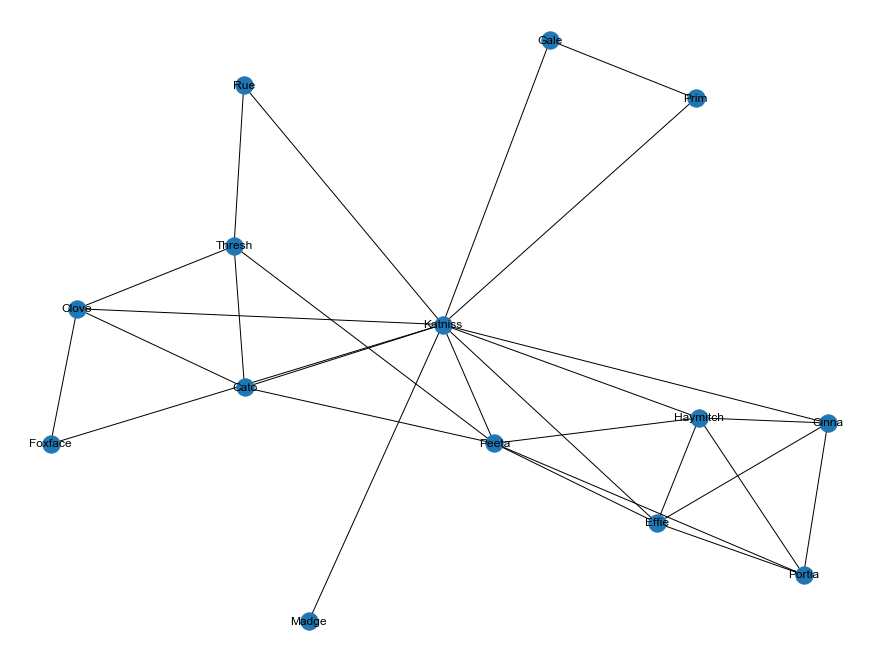

In [13]:
G = nx.from_pandas_edgelist(interaction_df,
                             source='source',
                             target='target')

nx.draw(G, with_labels=True)

Functions from [Bookworm](https://github.com/harrisonpim/bookworm/tree/d5fffe9630079236a64708f767186aa0748de4cf "Необязательная подсказка")

In [4]:
def load_book(book_path, lower=False):
    with open(book_path) as f:
        book = f.read()
    if lower:
        book = book.lower()
    return book



def get_sentence_sequences(book):
    detector = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = detector.tokenize(book)
    return sentences


def find_connections(sequences, characters):
    if any(len(names) > 1 for names in characters):
        df = pd.DataFrame({str(character):
                           {sequence: sum([sequence.count(name) for name in character])
                            for sequence in sequences}
                           for character in characters})
    else:
        characters = [c[0] for c in characters]
        df = pd.DataFrame([[sequence.count(character)
                            for character in characters]
                           for sequence in sequences],
                          index=sequences,
                          columns=characters)
    return df

def calculate_cooccurence(df):
    characters = df.columns.values
    cooccurence = df.values.T.dot(df.values)
    np.fill_diagonal(cooccurence, 0)
    cooccurence = pd.DataFrame(cooccurence, columns=characters, index=characters)
    return cooccurence


def get_interaction_df(cooccurence, threshold=0):
    rows, columns = np.where(np.triu(cooccurence.values, 1) > threshold)

    return pd.DataFrame(np.column_stack([cooccurence.index[rows],
                                         cooccurence.columns[columns],
                                         cooccurence.values[rows, columns]]),
                        columns=['source', 'target', 'value'])